# **Linear Regression Solution**

LINK : [lin_reg.ipynb](https://colab.research.google.com/drive/1SSh9FC_XrlM9Bf_KhHLeZtYCCD0tIQQR?authuser=0#scrollTo=DduU0nN8rMMn)

This model aims to predict absenteeism in the workplace based on various features such as the reason for absence, transportation expenses, distance from residence to work, and more. It preprocesses the data, trains a linear regression model, evaluates its performance, and visualizes the results. This can help organizations understand and potentially mitigate absenteeism by identifying key factors influencing it.

**The model ultimately provides predictions for absenteeism hours for each person for the next month based on their specific characteristics and historical absenteeism data.**

## Preprocessing the data




This section of the notebook focuses on preparing the absenteeism dataset for analysis. First, it reads the CSV file containing absenteeism data, handling any potential file-not-found errors. Next, it defines a preprocessing function that transforms the data by ensuring the correct data types for key columns (ID, Month of absence, and Absenteeism time in hours), drops rows with missing absenteeism values, and groups the data by ID and Month of absence to calculate the total absenteeism hours for each person each month. The resulting preprocessed data is sorted for better organization, saved to a new CSV file, and a preview of the first few rows is displayed to confirm the changes. This structured approach ensures that the data is clean and ready for modeling.

In [ ]:
import pandas as pd

# Step 1: Read the original dataset
try:
    # Specify the delimiter as a semicolon
    df = pd.read_csv('Absenteeism_at_work.csv', delimiter=';', encoding='utf-8')
    print(df.columns.tolist())  # Print the columns to verify
except FileNotFoundError:
    print("The specified file was not found. Please check the file path.")
    exit()

# Step 2: Define the preprocessing function
def preprocess_absenteeism(df):
    """
    Preprocess absenteeism data by calculating average absenteeism hours
    per person (ID) per month.
    """
    # Create a copy to avoid modifying the original dataframe
    df = df.copy()

    # Convert the columns to proper types if needed
    df['ID'] = df['ID'].astype(int)
    df['Month of absence'] = df['Month of absence'].astype(int)
    df['Absenteeism time in hours'] = df['Absenteeism time in hours'].astype(float)

    # Handle missing values if necessary
    df = df.dropna(subset=['Absenteeism time in hours'])

    # Group by ID and Month, calculate mean absenteeism
    preprocessed_data = df.groupby(['ID', 'Month of absence'])['Absenteeism time in hours'].sum().reset_index()

    # Rename columns for clarity
    preprocessed_data.columns = ['ID', 'Month', 'Average_Absenteeism_Hours']



    # Sort by ID and Month for better organization
    preprocessed_data = preprocessed_data.sort_values(['ID', 'Month'])

    return preprocessed_data

# Step 3: Apply preprocessing
try:
    processed_data = preprocess_absenteeism(df)

    # Step 4: Save to new CSV file
    processed_data.to_csv('preprocessed_absenteeism.csv', index=False)

    # Step 5: Verify the results by displaying first few rows
    print("First few rows of the preprocessed data:")
    print(processed_data.head())

    # Step 6: Print confirmation message
    print("\nPreprocessed data has been saved to 'preprocessed_absenteeism.csv'")

except Exception as e:
    print(f"An error occurred: {str(e)}")

['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
First few rows of the preprocessed data:
   ID  Month  Average_Absenteeism_Hours
0   1      1                        1.0
1   1      3                       16.0
2   1      4                       11.0
3   1      5                       16.0
4   1      6                       24.0

Preprocessed data has been saved to 'preprocessed_absenteeism.csv'


## Import *Libraries*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

## Read the Original Dataset

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('Absenteeism_at_work.csv', delimiter=';', encoding='utf-8')
except FileNotFoundError:
    print("The specified file was not found. Please check the file path.")
    exit()

print(df.columns.tolist())  # Print columns to verify

['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


## Define the Preprocessing Function

This section defines a function called preprocess_data to clean and prepare the absenteeism dataset for analysis. The function begins by converting key columns (ID, Month of absence, and Absenteeism time in hours) to their appropriate data types. It then removes any rows with missing values in the Absenteeism time in hours column. Unnecessary columns, such as ID, Son, Pet, Height, Weight, Social drinker, and Social smoker, are dropped to simplify the dataset. Finally, the function applies one-hot encoding to convert categorical variables into a numerical format suitable for modeling. The cleaned dataset is returned for further analysis, ensuring it is structured correctly for the modeling process.

In [ ]:
def preprocess_data(df):
    # Convert columns to the appropriate types
    df['ID'] = df['ID'].astype(int)
    df['Month of absence'] = df['Month of absence'].astype(int)
    df['Absenteeism time in hours'] = df['Absenteeism time in hours'].astype(float)

    # Handle missing values
    df = df.dropna(subset=['Absenteeism time in hours'])

    # Drop unnecessary columns (if any)
    df.drop(columns=['ID'], inplace=True)  # Example of dropping ID if not needed
    df.drop(columns=['Son'], inplace=True)
    df.drop(columns=['Pet'], inplace=True)
    df.drop(columns=['Height'], inplace=True)
    df.drop(columns=['Weight'], inplace=True)
    df.drop(columns=['Social drinker'], inplace=True)
    df.drop(columns=['Social smoker'], inplace=True)

    # One-hot encoding for categorical variables
    df = pd.get_dummies(df, drop_first=True)

    return df

# Preprocess the data
processed_data = preprocess_data(df)

## Define Features and Target Variable

In this section, the notebook defines the features (X) and target variable (y) for the modeling process. The feature set X is created by dropping the Absenteeism time in hours column from the processed dataset, as this column will be the target variable. The target variable y is assigned the values from the Absenteeism time in hours column.

Following this, the dataset is split into training and testing sets using an 80-20% ratio. The training set (X_train and y_train) will be used to train the model, while the testing set (X_test and y_test) will be used to evaluate the model's performance. This separation ensures that the model can be tested on unseen data, providing a more accurate assessment of its predictive capabilities.

In [ ]:
# Define features (X) and target variable (y)
X = processed_data.drop('Absenteeism time in hours', axis=1)
y = processed_data['Absenteeism time in hours']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the Features

In this section, the features are normalized using the MinMaxScaler. The fit_transform method scales the training set (X_train) to a range between 0 and 1, while the transform method applies the same scaling to the testing set (X_test). This ensures that both datasets are on the same scale, improving the model's performance and convergence during training, which is crucial for algorithms like linear regression.

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create and Train the Linear Regression Model


In this section, a linear regression model is created using the LinearRegression class from the sklearn.linear_model module. The model is then trained using the scaled training data (X_train_scaled and y_train). This process involves finding the best-fitting line that minimizes the error between the predicted and actual absenteeism hours, enabling the model to learn the relationships between the features and the target variable. Once trained, the model is ready for making predictions on new data.

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Make Predictions on the Test Set

In this section, predictions are made using the trained linear regression model on the scaled testing set (X_test_scaled). The predict method generates estimated absenteeism hours based on the features in the test data. These predictions can then be compared to the actual values to evaluate the model's performance and accuracy in predicting absenteeism.

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

## Calculate Evaluation Metrics

This section calculates key evaluation metrics to assess the performance of the linear regression model. The following metrics are computed:

**Mean Absolute Error (MAE):** Measures the average absolute difference between predicted and actual values.

**Mean Squared Error (MSE):** Assesses the average of the squares of the errors, emphasizing larger errors.

**R-squared (R²):** Indicates the proportion of variance in the target variable that is predictable from the features.

The results are printed, providing insights into the model's accuracy. Additionally, a relative accuracy metric is calculated as (1-(MAE)/mean(ytest))
 , offering a normalized measure of model performance.

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Print evaluation results
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R²):', r_squared)

# Calculate relative accuracy
accuracy = 1 - (mae / np.mean(y_test))
print('Model Accuracy (relative):', accuracy)

Mean Absolute Error (MAE): 5.1813850327463875
Mean Squared Error (MSE): 97.87333842665592
R-squared (R²): 0.10186278576202723
Model Accuracy (relative): 0.1591612008262442


In [ ]:
pip install matplotlib seaborn

## Visualize Results

In this section, visualizations are created to assess the model's performance:

**Actual vs. Predicted Values:** A scatter plot compares the actual absenteeism hours (y_test) against the predicted values. A 45-degree dashed line indicates where predicted values match actual values perfectly. This helps visualize the accuracy of predictions.

**Residuals Distribution:** A histogram displays the distribution of residuals (the differences between actual and predicted values). A kernel density estimate (KDE) is overlaid to show the density of residuals. A vertical dashed line at zero indicates the ideal point where predictions perfectly match actual values.

These visualizations provide insights into the model's predictive accuracy and any potential biases in the predictions.

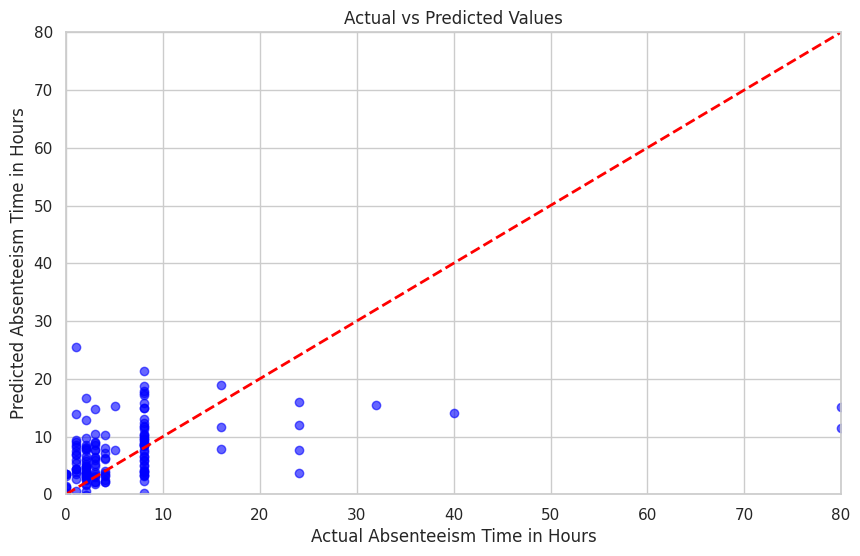

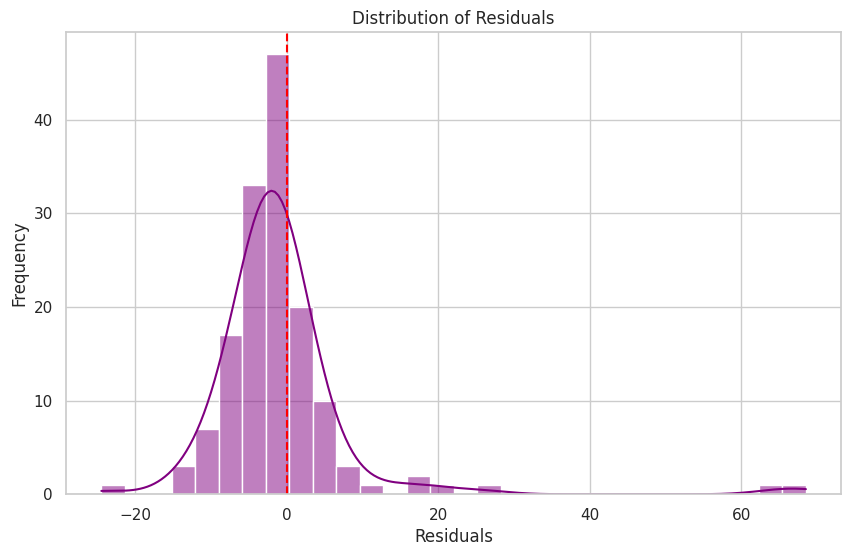

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Absenteeism Time in Hours')
plt.ylabel('Predicted Absenteeism Time in Hours')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid(True)
plt.show()

# Plotting Residuals
plt.figure(figsize=(10, 6))
residuals = y_test - predictions
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Line at zero
plt.grid(True)
plt.show()